# PrimBHoles toolkit: 

## Index
    * Set up (load common libraries, paths, etc)
    * Powerspectrum class (side class)
    * Threshold class (side class)
    * PrimBHoles :
        * Abundances Class
        * Merger rates
        * Merger SGWB (TODO)
        * second order SGWB
        * ....
        
        

## Set up

In [3]:
import numpy as np
import scipy.constants as const
import scipy.special as special
from scipy.special import erfc
from scipy.interpolate import interp1d
import scipy.integrate as integrate
from scipy.integrate import dblquad
import scipy.optimize as opt
import matplotlib.pyplot as plt

import matplotlib as mpl


import sys, os
#ROOTPATH = os.path.abspath(os.path.join(os.path.dirname( __file__ ), '..'))
ROOTPATH = os.getcwd()
SOURCEPATH = os.path.abspath(os.path.join(ROOTPATH, 'dev'))
PARAMSPATH = os.path.abspath(os.path.join(ROOTPATH, 'params'))
PLOTSPATH = os.path.abspath(os.path.join(ROOTPATH, 'plots'))
sys.path.append(ROOTPATH)
sys.path.append(SOURCEPATH)
sys.path.append(PARAMSPATH)

from power_spectrum import PowerSpectrum
from params.user_params import physics_units, cosmo_params, PSModels_params
from threshold import ClassThresholdsStandard, ClassThresholdsShapePrescription


# from baseclass import CLASSBase
# from power_spectrum import PowerSpectrum
# from threshold import ClassThresholds
# from merger_rates import MergerRates
# from abundances import CLASSabundances
from primbholes import primbholes 



#Specify the plot style
mpl.rcParams.update({'font.size': 10,'font.family':'serif'})
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rc('text', usetex=True)

mpl.rcParams['legend.edgecolor'] = 'inherit'


## PowerSpectrum

Attributes of  PS_Gaussian 
   >>    {'As': 0.0025, 'kp': 2000000.0, 'sigma': 0.25}
   >> min and max of PS:  0.0, 0.0024995737946524985 


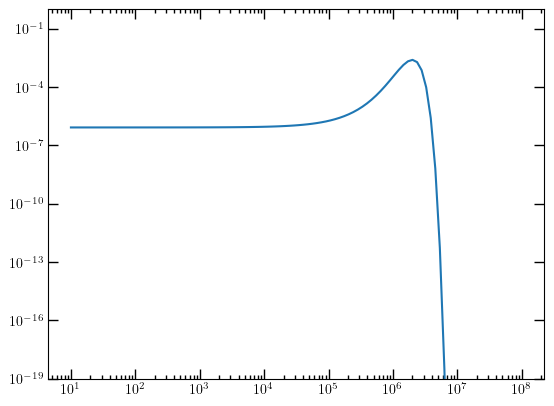

In [4]:
from power_spectrum import PowerSpectrum

# Example one model
myPS = PowerSpectrum.gaussian()

# myPS.As = 0.3
myPS.print_att()

ks = 10**np.linspace(1.0, 8.0, 100, True)   
print(f'   >> min and max of PS:  {np.min(myPS.PS(ks))}, {np.max(myPS.PS(ks))} ' )

plt.plot(ks, myPS.PS(ks))
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-19, 1)
# plt.savefig(PLOTSPATH + "/example_powerspectra_gaussian.png")
plt.show()
# plt.close()


Step 1b: Rescaling of the power spectrum to get f_PBH = 0.1
New scaling :  1e-05


/Users/cjoana/dev/LISA-PBH-WG/dev/abundances.py:133: RuntimeWarning: divide by zero encountered in scalar divide
  beta = np.exp(-0.5*(dcrit[i_s]/sig)**2)/np.sqrt(2*np.pi*(dcrit[i_s]/sig)**2)
/Users/cjoana/dev/LISA-PBH-WG/dev/abundances.py:79: RuntimeWarning: divide by zero encountered in log10
  function =  np.log10(a) -  np.log10(b)


New scaling :  100000.0


/Users/cjoana/dev/LISA-PBH-WG/dev/abundances.py:79: RuntimeWarning: invalid value encountered in log10
  function =  np.log10(a) -  np.log10(b)


New scaling :  1.0
New scaling :  0.0031622776601683794
New scaling :  0.05623413251903491
New scaling :  0.23713737056616552
New scaling :  0.4869675251658631
New scaling :  0.33982083289425596
New scaling :  0.28387359647587546
New scaling :  0.3105900223624705
New scaling :  0.2969314848202479
New scaling :  0.30368397473433195
New scaling :  0.307117587421919
New scaling :  0.3053959555382275
New scaling :  0.30453876213979436
New scaling :  0.30411106811046196
New scaling :  0.30389744639349675
New scaling :  0.303790691813279
New scaling :  0.3038440644149055
New scaling :  0.30387075423197757
New scaling :  0.30385740903039854
New scaling :  0.30386408155792566
New scaling :  0.3038607452758467
After rescaling, I get a total abundance of PBHs: fPBH= 0.10002192498130454
Rescaling factor= 0.3038607452758467
====
Step 1b: Rescaling of the power spectrum to get f_PBH = 0.1
New scaling :  1e-05
New scaling :  100000.0
New scaling :  1.0
New scaling :  316.22776601683796
New scaling :

/Users/cjoana/dev/LISA-PBH-WG/dev/abundances.py:235: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  sol, err = integrate.quad(_integrator_variance, kmin, kmax,  epsabs= 1e-25, epsrel= 1e-5, limit=int(1e4), limlst=int(1e2) )


New scaling :  100000.0
New scaling :  1.0
New scaling :  0.0031622776601683794
New scaling :  0.05623413251903491
New scaling :  0.23713737056616552
New scaling :  0.11547819846894582
New scaling :  0.16548170999431813
New scaling :  0.13823722273578995
New scaling :  0.12634629176544684
New scaling :  0.12079007474252844
New scaling :  0.1181042769089947
New scaling :  0.11678385645682465
New scaling :  0.11612919251372618
New scaling :  0.11580323804254564
New scaling :  0.11564060405421472
New scaling :  0.11572189247793174
New scaling :  0.11576255811511682
New scaling :  0.11578289629223695
New scaling :  0.11579306672070348
New scaling :  0.1157981522699477
New scaling :  0.11580069512832684
New scaling :  0.1157994236921574
After rescaling, I get a total abundance of PBHs: fPBH= 0.10004654487801937
Rescaling factor= 0.1157994236921574
====
Step 1b: Rescaling of the power spectrum to get f_PBH = 0.1
New scaling :  1e-05
New scaling :  100000.0
New scaling :  1.0
New scaling :  3

/Users/cjoana/dev/LISA-PBH-WG/dev/abundances.py:235: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  sol, err = integrate.quad(_integrator_variance, kmin, kmax,  epsabs= 1e-25, epsrel= 1e-5, limit=int(1e4), limlst=int(1e2) )


New scaling :  100000.0
New scaling :  1.0
New scaling :  0.0031622776601683794
New scaling :  0.05623413251903491
New scaling :  0.23713737056616552
New scaling :  0.11547819846894582
New scaling :  0.08058421877614819
New scaling :  0.09646616199111992
New scaling :  0.1055449600878603
New scaling :  0.10090350448414474
New scaling :  0.09865988956531019
New scaling :  0.09977539079932737
New scaling :  0.10033786221027048
New scaling :  0.10062028587448718
New scaling :  0.10076179567143612
New scaling :  0.1006910159134695
New scaling :  0.100726399575396
New scaling :  0.10070870619044157
New scaling :  0.10071755249438688
New scaling :  0.10071312924528551
New scaling :  0.10071534084555349
After rescaling, I get a total abundance of PBHs: fPBH= 0.09994548595348267
Rescaling factor= 0.10071534084555349
====
Step 1b: Rescaling of the power spectrum to get f_PBH = 0.1
New scaling :  1e-05
New scaling :  100000.0
New scaling :  1.0
New scaling :  0.0031622776601683794
New scaling : 

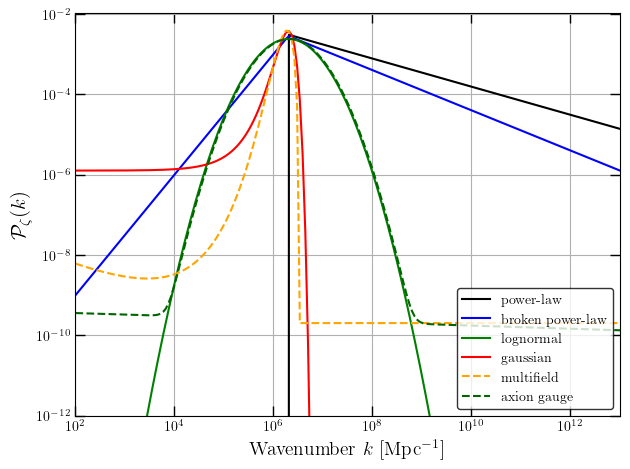

In [10]:
ComputeFPBH = True

# Example with several models
models = [ 
    'powerlaw',
    'broken_powerlaw',
    'lognormal',
    'gaussian',
    'multifield',
    'axion_gauge',
    # 'preheating',
    'vacuum'
]

model_name = [
    'power-law',
    'broken power-law',
    'lognormal',
    'gaussian',
    'multifield',
    'axion gauge',
    # 'preheating',   #   (2.20)
    'vacuum'
]

color_pal = ['k', 'b', 'g', 'r',  'orange', 'darkgreen', 'purple', 'k']
lstyle = ['-', '-', '-', '-',      '--', '--', '--', '--']


xmin = 10**2
xmax = 10**13
ymin = 1e-12
ymax = 1e-2 * 1.05
k_values = 10**np.linspace(np.log10(xmin), np.log10(xmax), 200)

figPk = plt.figure()
figPk.patch.set_facecolor('white')
ax = figPk.add_subplot(111)

scale =1 

for i, model in enumerate(models):
    PM = PowerSpectrum.get_model(model)
    # PM.kp=5e6
    # print('set kp to', PM.kp)
    ps_function = PM.PS
    
    ifpbh = ""
    if ComputeFPBH:
        if model=="vacuum": continue
        pb = primbholes(ps_function=ps_function, fpbh_rescaling=0.1)
        ifpbh = np.round(pb.get_integrated_fPBH(), 2)
        scale = pb.get_spectrum_scaling()
    
    xs = k_values
    ys = PM.PS(kk=k_values)   * scale  
    lbl = f"{model_name[i]}"
    ax.plot(xs, ys, label=lbl, color=color_pal[i], ls=lstyle[i])

ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.xlabel('Wavenumber $k$  [Mpc$^{-1}$]', fontsize=14)
plt.ylabel(r'$\mathcal{P}_{\zeta} (k)$', fontsize=15)

plt.legend(loc=4)
plt.grid(True)
plt.tight_layout()
plt.savefig(PLOTSPATH + "/example_powerspectra_models.png", dpi=300)
plt.show()


After rescaling, I get a total abundance of PBHs: fPBH= 1.0004890912864883
Rescaling factor= 0.317517128631511

====

After rescaling, I get a total abundance of PBHs: fPBH= 0.9998851435809062
Rescaling factor= 2.9369655047216514

====

After rescaling, I get a total abundance of PBHs: fPBH= 0.9996394049047383
Rescaling factor= 0.12092675313074892

====

scaling :  1.567039854036664
After rescaling, I get a total abundance of PBHs: fPBH= 0.9999582853654736
Rescaling factor= 1.567039854036664

====

After rescaling, I get a total abundance of PBHs: fPBH= 0.9997040229497783
Rescaling factor= 0.10525102491756518

====

After rescaling, I get a total abundance of PBHs: fPBH= 1.0000573476724959
Rescaling factor= 0.12104099141699594

## Threshold

In [9]:
from power_spectrum import PowerSpectrum
from params.user_params import physics_units, cosmo_params, PSModels_params
from threshold import ClassThresholdsStandard, ClassThresholdsShapePrescription

###### Set mass example:

Msun = physics_units.m_sun
# mPBH = Msun * 1.0
mPBH = 1.0

###### Set model example: 

PS_model = PowerSpectrum.axion_gauge()    
PS_func =  PS_model.PS_plus_vacuum


### Print threshold 

print(" ")
print("Example using Standard formalism:  ")
deltacrit = ClassThresholdsStandard(PS_func=PS_func)

dc = deltacrit.get_deltacr()
dc_thermal = deltacrit.get_deltacr_with_thermalhistory(mPBH)
print(" >> delta crit without / with thermal history ", dc, dc_thermal)

print("\n")
print("Example using Shape Prescription formalism: ")
deltacrit = ClassThresholdsShapePrescription(ps_function=PS_func)

dc = deltacrit.get_deltacr()
dc_thermal = deltacrit.get_deltacr_with_thermalhistory(mPBH)
print(" >> delta crit without / with thermal history ", dc, dc_thermal)

print("\n")
print("Issue: methods give very diferent threshold values. ")


## TODO: save shape parameter, and funtion to print it

 
Example using Standard formalism:  
 >> delta crit without / with thermal history  0.5 0.4618490480716858


Example using Shape Prescription formalism: 
 >> delta crit without / with thermal history  0.8695025750447951 0.8031578731606364


Issue: methods give very diferent threshold values. 


In [31]:
from threshold import ClassThresholdsStandard, ClassThresholdsShapePrescription

AsPBH, kp, sigma = [0.0205, 2.e6, 1.]       ## This example works fine! 
# AsPBH, kp, sigma = [0.0205, 2.e6, 0.5]    ## This example crashes...          # TODO: method need some testing! 

def PS_func(kk):
        return AsPBH * np.exp(- np.log(kk / kp) ** 2 / (2 * sigma ** 2))


method = ClassThresholdsShapePrescription(ps_function=PS_func)

dc = method.get_deltacr()

print(" >> delta critical is ", dc)

 >> delta critical is  0.8694606172753746


## PrimBHoles 

### Abundances

In [35]:
pb = primbholes()

##Example:
## Model A: Gaussian
sig =  0.25
As = 0.01*sig
kp = 1e6
ps_model = PowerSpectrum.gaussian(As=As, sigma=sig, kp=kp)

## Select with vacuum
ps_func =  ps_model.PS_plus_vacuum        # This is the default to calculate sigma and fPBH

pb.set_powerspectrum(ps_function=ps_func)

pb = primbholes(ps_function=ps_func)
# pb = CLASSabundances(ps_function = ps_func, threshold_method="standard")

mass = 10**np.linspace(-6,8, 30)  #* Msun
fpbh = pb.get_fPBH(mass)

floor = 1e-8
beta = pb.get_beta(mass)  #+ floor
fpbh = pb.get_fPBH(mass)  + floor
sigma = pb.get_variance(mass)

# dc = pb.get_deltacr()  ## TODO: not implemented yet in the primbholes class


print(f"fPBH = {fpbh}")

print(" >> delta critical is ", dc)

fPBH = [1.00000000e-08 1.00000000e-08 1.00000000e-08 1.00000000e-08
 1.00000000e-08 1.00000000e-08 1.00000000e-08 1.00000000e-08
 1.00000000e-08 1.00000000e-08 1.00000000e-08 1.00000000e-08
 1.00000000e-08 1.00000000e-08 1.00000000e-08 2.78570083e-03
 1.00000000e-08 1.00000000e-08 1.00000000e-08 1.00000000e-08
 1.00000000e-08 1.00000000e-08 1.00000000e-08 1.00000000e-08
 1.00000000e-08 1.00000000e-08 1.00000000e-08 1.00000000e-08
 1.00000000e-08 1.00000000e-08]
 >> delta critical is  0.8694606172753746


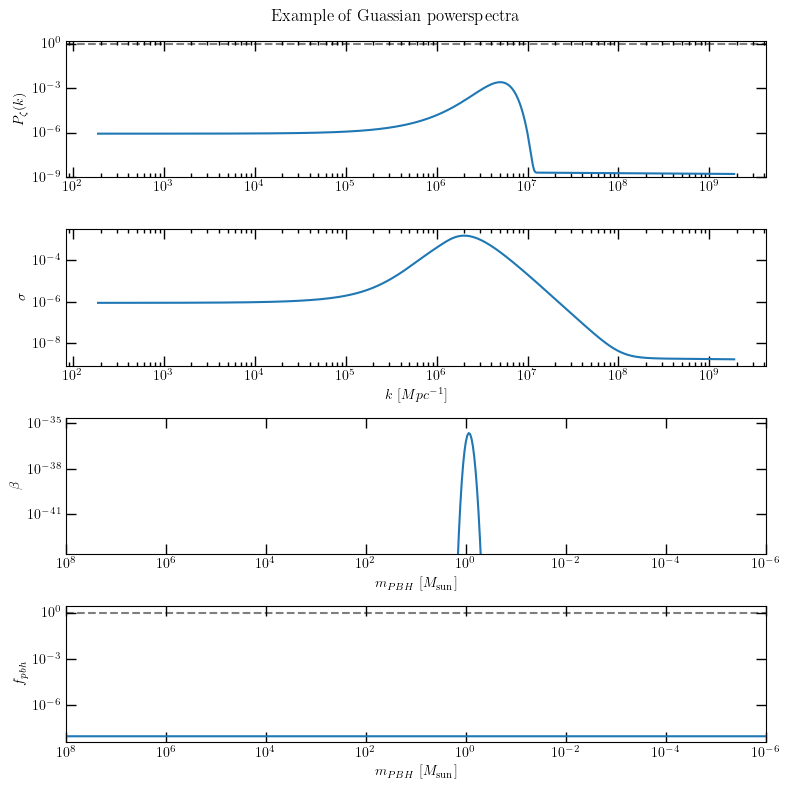

In [8]:
def k_of_m(mass):
    ratio_mPBH_over_mH = 0.8
    kmsun = 2.1e6
    mH = mass / ratio_mPBH_over_mH
    kk = kmsun / mH ** (0.5)  # S. Clesse: to be checked
    return kk
def m_of_k(k):

    ratio_mPBH_over_mH = 0.8
    kmsun = 2.1e6

    mass = (kmsun/k)**2 *  ratio_mPBH_over_mH
    return mass




test = 0
Msun = physics_units.m_sun

## Model A: Gaussian
sig =  0.25
As = 0.01*sig
kp = 5e6
PS_model = PowerSpectrum.gaussian(As=As, sigma=sig, kp=kp)

## Model B : axion_gauge
# PS_model = PowerSpectrum.axion_gauge()    
# PS_model = PowerSpectrum.axion_gauge(As=As, sigma=sig, kp=kp)

## Select with vacuum
PS_func =  PS_model.PS_plus_vacuum        # This is the default to calculate sigma and fPBH

## Select threshold calc method
a = primbholes(ps_function = PS_func, threshold_method="standard")    # a = CLASSabundances(ps_function = PS_func, threshold_method="standard")
# a = primbholes(ps_function = PS_func, threshold_method="ShapePrescription")   # a = CLASSabundances(ps_function = PS_func, threshold_method="ShapePrescription")   

## Params range: 
mass = 10**np.linspace(-6,8, 500)  #* Msun
floor = 1e-8

# Compute quantities
beta = a.get_beta(mass)  #+ floor
fpbh = a.get_fPBH(mass)  + floor
sigma = a.get_variance(mass)


##### Make Plot 

fig, axs = plt.subplots(4,1, figsize=(8,8))

fig.suptitle("Example of Guassian powerspectra")
kk =  k_of_m(mass)
ax = axs[0]
ax.plot(kk, PS_func(kk))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$P_\zeta(k)$")
ax.set_ylim(1e-9, 1.5)
ax.axhline(1, color="k", ls="--", alpha=0.5)


ax = axs[1]
ax.plot(kk, sigma)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$\sigma$")
ax.set_xlabel(r"$k\ [Mpc^{-1}]$")

ax = axs[2]
ax.plot(mass, beta)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$\beta$")
ax.set_xlabel(r"$m_{PBH}\ [M_{\rm sun}]$")
ax.set_xlim(max(mass), min(mass))
ax.set_ylim(beta.max()*1e-8, beta.max()*10)

ax = axs[3]
ax.plot(mass, fpbh)
ax.axhline(1, color="k", ls="--", alpha=0.5)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$f_{pbh}$")
ax.set_xlabel(r"$m_{PBH}\ [M_{\rm sun}]$")
ax.set_xlim(max(mass), min(mass))

plt.tight_layout()
# plt.savefig(PLOTSPATH + "/example_abundances.png")
# plt.show()

### Merger rates

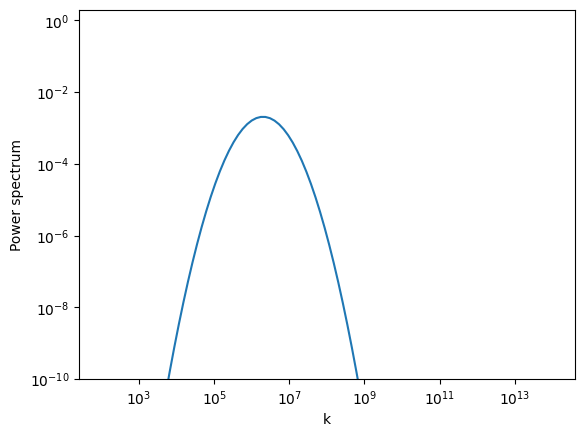

/var/folders/1g/rr9w26j92c7814lfhsctmwh40000gn/T/ipykernel_6019/3799999495.py:36: RuntimeWarning: divide by zero encountered in log10
  Z =  np.transpose(np.log10(sol))


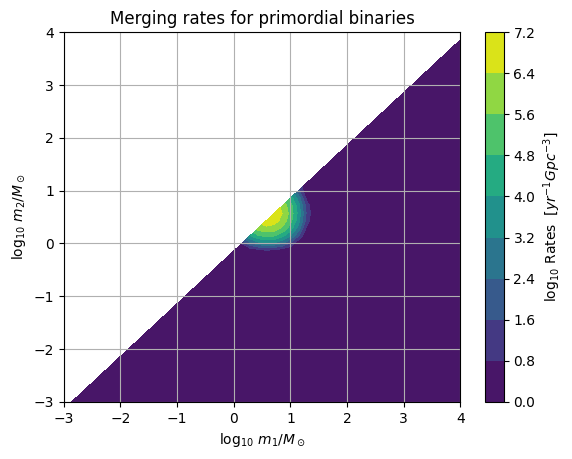

In [51]:
from power_spectrum import PowerSpectrum
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

masses =  10**np.linspace(-3,4, 50)  

# PS_model = PowerSpectrum.gaussian(kp=2.e6, As=0.0205, sigma=1.)
# PS_func =  PS_model.PS

def PS_func(kk):
    AsPBH, kp, sigma = [0.00205, 2.e6, 1.]
    # AsPBH *= 1.183767
    return AsPBH * np.exp(- np.log(kk / kp) ** 2 / (2 * sigma ** 2))


ks = 10**np.linspace(2,14, 100) 
plt.plot(ks , PS_func(ks))
plt.ylim(1e-10, 2)
plt.ylabel("Power spectrum")
plt.xlabel("k")
plt.xscale("log")
plt.yscale("log")
plt.show()

pb =  primbholes(ps_function=PS_func)   #  CLASSabundances(ps_function=PS_func)
fpbhs = pb.get_fPBH(masses)

sol = MergerRates().get_rates_clusters(masses, fpbhs) 
# sol = pb.get_rates_clusters(masses, fpbhs)                       # TODO : currently don't work (problem with class inheritance) 



figRprim = plt.figure()
# figRprim.patch.set_facecolor('white')
ax = figRprim.add_subplot(111)
Z =  np.transpose(np.log10(sol))
floor = 0.0
Z[(Z<floor)] = floor
cs=ax.contourf(np.log10(masses),np.log10(masses),Z, levels=10) 
plt.title("Merging rates for primordial binaries")
cbar = figRprim.colorbar(cs)
cbar.set_label(r'log$_{10}$ Rates  [$yr^{-1}Gpc^{-3}$]', rotation=90)
#ax.set_xscale('log')
#ax.set_yscale('log')
#plt.ylim(1.e-4,1.e1)
plt.xlabel(r'$\log_{10} \, m_1 /M_\odot $')
plt.ylabel(r'$\log_{10} \, m_2 /M_\odot $')
plt.grid(True)
# figRprim.savefig(PLOTSPATH + "/example_RatesPrim.png", facecolor=figRprim.get_facecolor(), edgecolor='none',dpi=300)
plt.show()

### Merger SGWB    (TODO)

In [ ]:
# TODO
##########






### 2nd Order SGWB

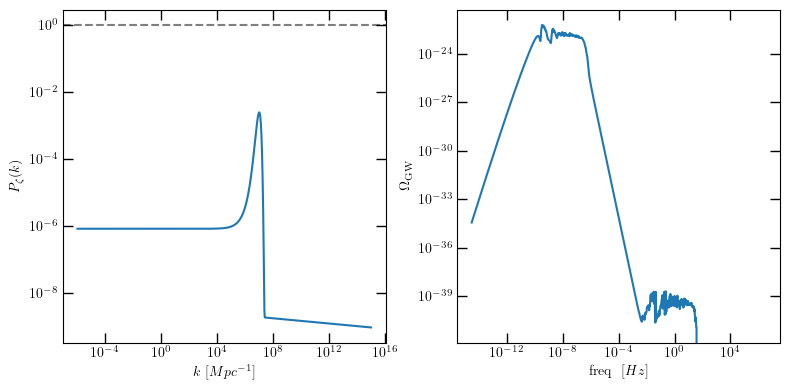

In [7]:
from second_order_SGWB import SecondOrderSGWB

## Model A: Gaussian
sig =  0.25
As = 0.01*sig
kp = 1e7
ps_model = PowerSpectrum.gaussian(As=As, sigma=sig, kp=kp)

## Model B : axion_gauge
# ps_model = PowerSpectrum.axion_gauge()    
# ps_model = PowerSpectrum.axion_gauge(As=As, sigma=sig, kp=kp)

## Select with vacuum
ps_func =  ps_model.PS_plus_vacuum        # This is the default to calculate sigma and fPBH

# Call the class 
SOGW = SecondOrderSGWB(ps_function=ps_func)

kvals = 10**np.linspace(-6,15, 1000)

# Call the class 
SOGW = SecondOrderSGWB(ps_function=ps_func)   
## SOGW = pb.get_2ndOrderGWs(ps_function=PS_func)                 ## TODO: not implemented yet in the primbhole class

kvals = 10**np.linspace(-6,15, 1000)  


fig, axs = plt.subplots(1,2, figsize=(8,4))
###################################################

ax = axs[0]
x = kvals
y = ps_func(kvals)
###################
ax.plot(x, y)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$P_\zeta(k)$")
ax.set_xlabel(r"$k\ [Mpc^{-1}]$")
# ax.set_ylim(1e-9, 1.5)
ax.axhline(1, color="k", ls="--", alpha=0.5)
###################################################

ax = axs[1]
x = SOGW.get_frequencies(kvals)
y = SOGW.get_OmegaGWs(kvals)
###################
ax.plot(x, y)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$\Omega_{\rm GW}$")
ax.set_xlabel(r"freq $\ [Hz]$")
# ax.set_ylim(1e-9, 1.5)
# ax.axhline(1, color="k", ls="--", alpha=0.5)

plt.tight_layout()
# plt.savefig(PLOTSPATH + "/example_2ndOrderSGWB.png", dpi=300)

plt.show()

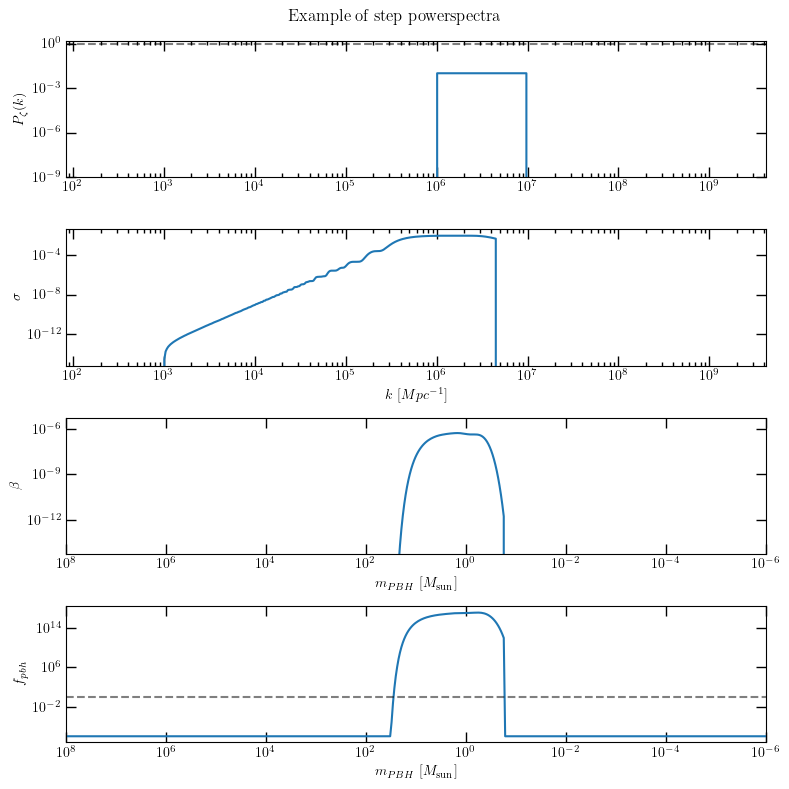

In [24]:
def k_of_m(mass):
    ratio_mPBH_over_mH = 0.8
    kmsun = 2.1e6
    mH = mass / ratio_mPBH_over_mH
    kk = kmsun / mH ** (0.5)  # S. Clesse: to be checked
    return kk
def m_of_k(k):

    ratio_mPBH_over_mH = 0.8
    kmsun = 2.1e6

    mass = (kmsun/k)**2 *  ratio_mPBH_over_mH
    return mass




test = 0
Msun = physics_units.m_sun



# def PS_func(k, ma=1e-2, mb=1e2):
    
#     kk = k 
#     out = np.zeros_like(kk)
#     a = k_of_m(ma)
#     b = k_of_m(mb)
#     mask = ((kk<=a) & (kk>=b))
#     out[mask] = 1
#     mask = ((kk>=a) & (kk<=b))
#     out[mask] = 1
    
#     return out * 0.01


def PS_func(k, a=1e6, b=1e7):
    
    kk = k 
    out = np.zeros_like(kk)
    mask = ((kk<=a) & (kk>=b))
    out[mask] = 1
    mask = ((kk>=a) & (kk<=b))
    out[mask] = 1
    
    return out * 0.01
    
    
    
    
    
## Select threshold calc method
a = primbholes(ps_function = PS_func, threshold_method="standard")    # a = CLASSabundances(ps_function = PS_func, threshold_method="standard")
# a = primbholes(ps_function = PS_func, threshold_method="ShapePrescription")   # a = CLASSabundances(ps_function = PS_func, threshold_method="ShapePrescription")   

## Params range: 
mass = 10**np.linspace(-6,8, 500)  #* Msun
floor = 1e-8

# Compute quantities
beta = a.get_beta(mass)  #+ floor
fpbh = a.get_fPBH(mass)  + floor
sigma = a.get_variance(mass)


##### Make Plot 

fig, axs = plt.subplots(4,1, figsize=(8,8))

fig.suptitle("Example of step powerspectra")
kk =  k_of_m(mass)
ax = axs[0]
ax.plot(kk, PS_func(kk))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$P_\zeta(k)$")
ax.set_ylim(1e-9, 1.5)
ax.axhline(1, color="k", ls="--", alpha=0.5)


ax = axs[1]
ax.plot(kk, sigma)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$\sigma$")
ax.set_xlabel(r"$k\ [Mpc^{-1}]$")

ax = axs[2]
ax.plot(mass, beta)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$\beta$")
ax.set_xlabel(r"$m_{PBH}\ [M_{\rm sun}]$")
ax.set_xlim(max(mass), min(mass))
ax.set_ylim(beta.max()*1e-8, beta.max()*10)

ax = axs[3]
ax.plot(mass, fpbh)
ax.axhline(1, color="k", ls="--", alpha=0.5)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$f_{pbh}$")
ax.set_xlabel(r"$m_{PBH}\ [M_{\rm sun}]$")
ax.set_xlim(max(mass), min(mass))

plt.tight_layout()
# plt.savefig(PLOTSPATH + "/example_abundances.png")
plt.show()